<H1 style="text-align: center">ECMM422 - Machine Learning</H1>
<H2 style="text-align: center">Assignment 1: Classifiers</H2>



| <font style="font-size:larger;">Date set     | <font style="font-size:larger;">Hand-in date |
|:------------------|:-----------------------------------|
|<font style="font-size:larger;"> 24th January 2019 |<font style="font-size:larger;">**  12 noon, Wednesday 5th February 2020** |

</font>

Candidate number:  <font color="red">660022200</font>

Marking is anonymous, so please don't write your name or reveal your identity!


The module assessment is comprised of your IPython notebooks. There will be four marked assignments, of which this is the first. All assignments will be equally weighted and therefore worth 25% of your module mark. 


Your IPython notebook should show what you did, what was the
result, and what you can conclude from the exercise. For some reports you will need to comment on a paper you have read.   Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

### Submitting the notebooks

Note that an electronic submission is required.  You should also submit the notebook electronically at [electronic hand-in system]( http://empslocal.ex.ac.uk/submit/).  You just need to submit the single .ipynb file that is the notebook, so you should be able to upload it directly from the directory where you have saved it on a University machine or your laptop.  If you're not sure where in your homespace it is, type <code>pwd</code> (print working directory) in a cell to find out where the notebooks are.

<b>Note: you must also submit your cover sheet and E-Submit receipt via BART to complete the submission.</b>



<div class="alert alert-info">
 Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 
 </div>

In [ ]:
###PLEASE RUN CHRONOLOGICALLY

In [39]:
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm_notebook as tqdm #loading bars

## 1. Classification

In the first part of this workshop, we will work on a simple classification problem with synthetic data. The dataset has one binary target $t\in \{0,1\}$ and two features $\mathbf{x} = [x_1,x_2]$. This will allow to visualise the data and model decision boundary on 2D plots.

First, you should download and load the data in from two files on the VLE, the files should be placed in the same folder as the jupyter notebook. The files contain the $\mathbf{x}$ and $t$ values for 500 samples.

[0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0
 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1
 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1
 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1
 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0
 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0
 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 0 

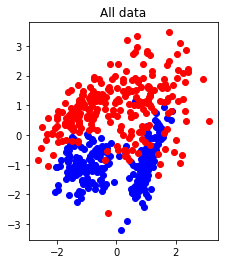

In [2]:
# we first load each file in a separate array
Xall = np.load('ecmm422_ca1_part1_X.npy')
tall = np.load('ecmm422_ca1_part1_t.npy')
print(tall)
print(len(tall))
# then we plot all data using matplotlib - note the indexing to select only samples from one class or the other
plt.plot(Xall[tall==0, 0], Xall[tall==0, 1], 'bo')
plt.plot(Xall[tall==1, 0], Xall[tall==1, 1], 'ro')
plt.axis('scaled')
plt.title('All data')
plt.show()

It is clear that it cannot be completely separated by a straight line, so these data are said not to be "linearly separable".

The first step in any machine learning work will be to separate and put aside a test set for final evaluation. Often this set will be sampled randomly from the available data, but for this workshop we will use a specific subset of half the data so that performance is comparable. 

range(0, 500)
range(0, 250)
range(250, 500)


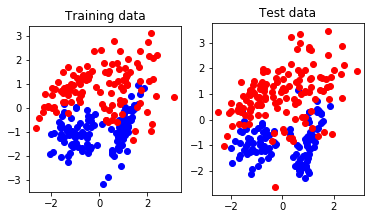

In [3]:
I = range(len(tall))    # you could change this for np.random.permutation(len(tall)) to get a random selection
                        # do not do this for this workshop as I want to be able to compare final performance. 
print(I)
Itrain = I[:len(tall)//2]   # First half of indices for training
Itest = I[len(tall)//2:]    # Second half for test
print(Itrain)
print(Itest)
Xtr = Xall[Itrain,:] # we define variables for the training set...
ttr = tall[Itrain]   

Xte = Xall[Itest,:]  # ... and for the test set
tte = tall[Itest]   

# then we plot both sets
plt.subplot(121)
plt.plot(Xtr[ttr==0, 0], Xtr[ttr==0, 1], 'bo')
plt.plot(Xtr[ttr==1, 0], Xtr[ttr==1, 1], 'ro')
plt.axis('scaled')
plt.title('Training data')

plt.subplot(122)
plt.plot(Xte[tte==0, 0], Xte[tte==0, 1], 'bo')
plt.plot(Xte[tte==1, 0], Xte[tte==1, 1], 'ro')
plt.axis('scaled')
plt.title('Test data')

# note that we would usually also label axes, but in this case the features 
# are unnamed so this would not add much information. 

plt.show()


Good. We can see in those plots that the two distributions are comparable, so we did not create a pathological split (eg, one that would contain only one class!) by accident. 

<b>NB:</b> We must <b>not</b> use the test data as part of the training process.

We will use three different algorithms in this workshop: k-NN, Neural Networks and decision trees. 

### 1.1 Classification with k-nearest neighbours
As a first step, we will try to model the dataset distribution using k-Nearest Neighbours. 
We will use the k-nearest neighbour classifier from scikit learn, which is  quite an extensive implementation of various machine learning algorithms.

In [4]:
from sklearn import neighbors

To start off, we use **all** the training data.

In [5]:
k = 5   # Choose the number of nearest neighbours

knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtr, ttr)

# we can get the performance on the training set
Str = knn.score(Xtr, ttr)

# we can also calculate the performance on the test set: 
Ste = knn.score(Xte, tte)

print('Performance with k=%i,\n\t- on training set %f \n\t- on test set %f' % (k, Str, Ste))


Performance with k=5,
	- on training set 0.952000 
	- on test set 0.916000


In the following cell, we will set up a grid of points to be classified over the whole domain and then classify them with the k-nn classifier, plotting the result in the corresponding place on the grid.  This gives a nice visualisation of the classfier's performance.


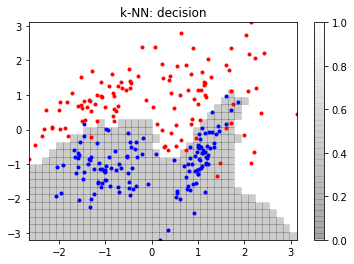

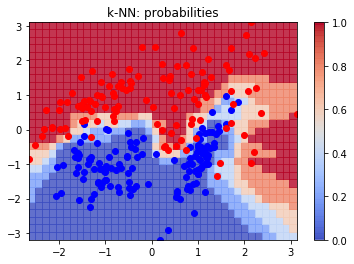

In [6]:
# we use this to calculate classification accuracy, you can as easily calculate it by hand though. 
from sklearn import metrics

def plot_decision_regions(X, t, model, label='model', show_decision=True, show_probabilities=True):
    '''
    For convenience, we will use this function to draw the decision boundaries and probabilities of the learnt 
    models. 
    Xtr: the features 
    ttr: the labels
    model: the trained model to display
    label: the name of the model (for figure captions)
    show_decision: draw decision boundary plot (default: true)
    show_probabilities: draw class probabilities (default: true)
    '''
    N, M = 40, 30   # Make these larger to get a smoother picture

    X1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), N)
    X2 = np.linspace(np.min(X[:,1]), np.max(X[:,1]), M)
    pred = np.zeros((M,N))
    prob = np.zeros((M,N,2))

    # Writing this double loop is not very efficient, but it is clear.
    for nx2, x2 in enumerate(X2):
        for nx1, x1 in enumerate(X1):
            pred[nx2, nx1] = model.predict([[x1, x2]])          # Predict expects a matrix of features
            if show_probabilities:
                prob[nx2, nx1, :] = model.predict_proba([[x1, x2]]) # Probabilities of belonging to one class
            

    if show_decision:
        plt.figure() 
        plt.pcolor(X1, X2, pred, cmap=plt.cm.gray, alpha=0.2)
        plt.colorbar()
        plt.plot(X[t==0,0], X[t==0,1], 'b.')
        plt.plot(X[t==1,0], X[t==1,1], 'r.')
        plt.axis('tight')
        plt.title('{}: decision'.format(label))

    if show_probabilities:
        # Plot the probabilites of belonging to the 1 class.
        plt.figure()
        plt.pcolor(X1, X2, prob[:,:,1], cmap=plt.cm.coolwarm, alpha=0.8)
        plt.colorbar()
        plt.plot(X[t==0,0], X[t==0,1], 'bo')
        plt.plot(X[t==1,0], X[t==1,1], 'ro')
        plt.axis('tight')
        plt.title('{}: probabilities'.format(label))
        
plot_decision_regions(Xtr, ttr, model=knn, label='k-NN')

Above we used all the training data and guessed the value of $k$. Much better is to estimate the optimum value of $k$, but dividing the training data into a training and a <b>validation</b> set; the generalisation error is then estimated on the validation set and the $k$ giving the minimum error is used for making predictions about unknown data.

Better than just dividing the training data into two is to use $k$ fold <b>cross validation</b> (don't confuse the $k$ in $k$ cross validation with the $k$ in $k$ nearest neighbours!)

The following cell shows how the sklearn routines may be used to produce training and validation sets automatically. More information at <http://scikit-learn.org/stable/modules/cross_validation.html>.  Don't worry about the deprecation warnings!

In [7]:
from sklearn.model_selection import KFold

# Make our 'training data' of 10 examples, each of two columns.
# These have just got integers in so that you can easily see which 
# examples have been selected.
X = np.vstack((np.arange(10), np.arange(10))).T + 10
t = np.arange(10)+100   # Targets
print("Features")
print(X)
print("Targets")
print(t)
print()
print()

kf = KFold(n_splits=5, shuffle=True)# 5 fold CV here.

fold = 0
for train, validation in kf.split(X):
    print('-------- Fold', fold)
    print('Train')
    print(X[train])
    print(t[train])
    print('Test')
    print(X[validation])
    print(t[validation])
    fold += 1
    # Notice that each training set consists of 8 of the 10 examples 
    # and the validation set is the remaining 2.
    # You should train the model with X[train] and t[train]
    # and estimate the generalisation error on X[validation] and 
    # t[validation].  Don't forget to average the validation error 
    # over all the folds - you can also estimate the standard deviation 
    # to get error bars on the validation error!
print(kf)

Features
[[10 10]
 [11 11]
 [12 12]
 [13 13]
 [14 14]
 [15 15]
 [16 16]
 [17 17]
 [18 18]
 [19 19]]
Targets
[100 101 102 103 104 105 106 107 108 109]


-------- Fold 0
Train
[[10 10]
 [11 11]
 [12 12]
 [14 14]
 [15 15]
 [16 16]
 [17 17]
 [18 18]]
[100 101 102 104 105 106 107 108]
Test
[[13 13]
 [19 19]]
[103 109]
-------- Fold 1
Train
[[11 11]
 [12 12]
 [13 13]
 [15 15]
 [16 16]
 [17 17]
 [18 18]
 [19 19]]
[101 102 103 105 106 107 108 109]
Test
[[10 10]
 [14 14]]
[100 104]
-------- Fold 2
Train
[[10 10]
 [13 13]
 [14 14]
 [15 15]
 [16 16]
 [17 17]
 [18 18]
 [19 19]]
[100 103 104 105 106 107 108 109]
Test
[[11 11]
 [12 12]]
[101 102]
-------- Fold 3
Train
[[10 10]
 [11 11]
 [12 12]
 [13 13]
 [14 14]
 [15 15]
 [16 16]
 [19 19]]
[100 101 102 103 104 105 106 109]
Test
[[17 17]
 [18 18]]
[107 108]
-------- Fold 4
Train
[[10 10]
 [11 11]
 [12 12]
 [13 13]
 [14 14]
 [17 17]
 [18 18]
 [19 19]]
[100 101 102 103 104 107 108 109]
Test
[[15 15]
 [16 16]]
[105 106]
KFold(n_splits=5, random_state=No

Make a plot of the training and validation errors as $k$ varies from 1 to, say, 50.  Here, just use the number of misclassified samples as the error, but you could also use the cross entropy (how do they differ?). 
<div style="text-align: right"><b>[10 marks]</b></div>

*  What is the best value of $k$?  
*  What is the error on the **test** set with the best $k$?
*  Make a plot of the decision regions (as above) with the best $k$
*  What can you say about the performance of the classifier when $k$ is too large or too small?
*  How do you think the optimum $k$ will vary if the amount of training data available is larger or smaller than 250 points?  Can you test your hypothesis?
<div style="text-align: right"><b>[10 marks]</b></div>

<b>Make a plot of the training and validation errors as  𝑘  varies from 1 to, say, 50. Here, just use the number of misclassified samples as the error, but you could also use the cross entropy (how do they differ?).</b>

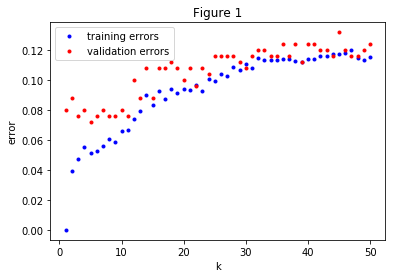

In [8]:
def find_err(Xtr,ttr,kvals,folds):
    t_err_vec = np.zeros((1,len(kvals)))  #initialises training error vector 
    v_err_vec = np.zeros((1,len(kvals)))  #initialises validation error vector
    for i in kvals:
        knn = neighbors.KNeighborsClassifier(n_neighbors=i)  #redefines knn for each value of k
        kf = KFold(n_splits=folds, shuffle=True) #sets up the kfold with 'folds' splits
        t_err = 0
        v_err = 0
        for train, validation in kf.split(Xtr):
            knn.fit(Xtr[train], ttr[train])  #We fit a classifier based on our training data for each fold
            t_err = t_err + (1-knn.score(Xtr[train],ttr[train]))  #adds the training errors for each fold
            v_err = v_err + (1-knn.score(Xtr[validation],ttr[validation]))  #adds the validation errors for each fold
        
        
        t_err_vec[0,i-1] = t_err  #the total training error is stored in a vector; with position based on k value
        v_err_vec[0,i-1] = v_err  #the total validation error is stored in a vector; with position based on k value
    
    avt_err = t_err_vec/folds 
    avv_err = v_err_vec/folds  #turns total error vector into average error vector
    matr = np.stack((avt_err[0,:],avv_err[0,:]), axis=0) #stacks the vectors to output
    return matr


kvals = np.arange(50) + 1  #vector of k values
out = find_err(Xtr,ttr,kvals,10) #function above retrieves average training and validation errors for multiple k values
plt.figure()
plt.plot(kvals,out[0,:], 'b.', label = 'training errors')  #plots training errors against k
plt.plot(kvals,out[1,:], 'r.', label = 'validation errors') #plots validation errors against k
plt.title('Figure 1') 
plt.xlabel('k')
plt.ylabel('error')
plt.legend()

We plot the averaged training and validation errors across the folds against k. As expected we observe k = 1 to have zero training error. We observe that as k increases the training error increases; the training error seems to plateau at an error between 0.10 and 0.12 which starts at roughly k = 30. We also observe that as k increases, the validation error increases but with a weaker correlation. The training errors tend to stay below the validation errors for all k as we do expect our training errors to underestimate our validation errors.

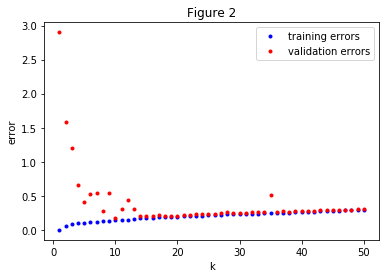

In [21]:
def find_err_ce(Xtr,ttr,kvals,folds):
    t_err_vec = np.zeros((1,len(kvals)))  #initialises training error vector 
    v_err_vec = np.zeros((1,len(kvals)))  #initialises validation error vector
    for i in kvals:
        knn = neighbors.KNeighborsClassifier(n_neighbors=i)  #redefines knn for each value of k
        kf = KFold(n_splits=folds, shuffle=True) #sets up the kfold with 'folds' splits
        t_err = 0
        v_err = 0
        for train, validation in kf.split(Xtr):
            knn.fit(Xtr[train], ttr[train])  #We fit a classifier based on our training data for each fold
            t_err = t_err + metrics.log_loss(ttr[train],knn.predict_proba(Xtr[train])[:,1])  #cross entropy loss
            v_err = v_err + metrics.log_loss(ttr[validation],knn.predict_proba(Xtr[validation])[:,1])
        
        t_err_vec[0,i-1] = t_err  #the total training error is stored in a vector; with position based on k value
        v_err_vec[0,i-1] = v_err  #the total validation error is stored in a vector; with position based on k value
    
    avt_err = t_err_vec/folds 
    avv_err = v_err_vec/folds  #turns total error vector into average error vector
    matr = np.stack((avt_err[0,:],avv_err[0,:]), axis=0) #stacks the vectors to output
    return matr


kvals = np.arange(50) + 1  #vector of k values
out2 = find_err_ce(Xtr,ttr,kvals,10) #function above retrieves average training and validation errors for multiple k values
plt.figure()
plt.plot(kvals,out2[0,:], 'b.', label = 'training errors')  #plots training errors against k
plt.plot(kvals,out2[1,:], 'r.', label = 'validation errors')  #plots validation errors against k 
plt.title('Figure 2') 
plt.xlabel('k')
plt.ylabel('error')
plt.legend()

For comparison we now use cross entropy as our error rather than the percentage of misclassified samples. We do this by implementing the log_loss function within sklearn.metrics. Log-loss is similar to cross entropy but not the same. We are able to use log_loss when calculating error rates between 0 and 1 as it works out to the same as cross entropy. Again we find our validation errors are always above our training errors and the training errors follow a similar correlation to the previous case. However we observe that the validation errors spike upwards as we tend to k = 0 for small values of k. This is due to the nature of the log_loss function where when the probabilities get close to 0 we see the log function spike/increase rapidly. This means that confident incorrect predictions are penalized heavily in comparison to the previous case.  

<b>What is the best value of 𝑘 ?</b>

In [11]:
r = np.where(out[1,:] == np.amin(out[1,:])) #finds location of minimum in validation error vector
print("The best value of k is", int(kvals[r]))

The best value of k is 5


We choose the best value of k based on the minimal validation error after training the data using cross validation.  The corresponding k value I retrieve is shown above.

<b>What is the error on the test set with the best 𝑘 ?</b>

In [12]:
bestk = int(kvals[r])
knn = neighbors.KNeighborsClassifier(n_neighbors=bestk)
knn.fit(Xtr,ttr) #we fit the classifier based on our training data
err = 1-knn.score(Xte,tte)
print("The error on my test set for k =",bestk,"is",err)

The error on my test set for k = 5 is 0.08399999999999996


<b>Make a plot of the decision regions (as above) with the best 𝑘 </b>

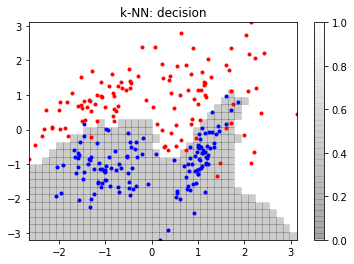

In [13]:
plot_decision_regions(Xtr, ttr, model=knn, label='k-NN',show_probabilities= not True)

<b>What can you say about the performance of the classifier when 𝑘 is too large or too small?</b>

Our training error will not necessarily predict an accurate performance of our classifier as it is calculated on the data we trained the model on in each fold. Instead we analyse our validation error in figure 1 as a measure of the performance. 

In figure 1 we observe a positive correlation between validation error and k, so we can say the performance of our classifier is weaker for larger values of k (plus it is computationally more expensive). On the other hand our performance is not necessarily strong for small values of k, for example when k = 1 as we could still get a high validation error which would mean our classification model had been overfitted and allowed the noise to have too large an influence on our classification. An example of this can be seen below where our boundaries are very rigid and may not predict the test dataset well. 

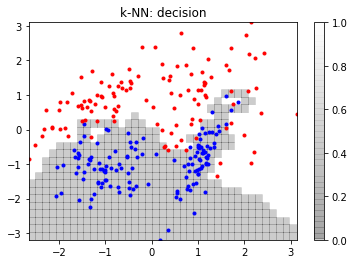

In [14]:
knnover = neighbors.KNeighborsClassifier(n_neighbors=1)
knnover.fit(Xtr,ttr)
plot_decision_regions(Xtr, ttr, model=knnover, label='k-NN',show_probabilities= not True)

<b>How do you think the optimum  𝑘  will vary if the amount of training data available is larger or smaller than 250 points? Can you test your hypothesis?</b>

The optimum k should get larger as the training data gets larger. This is because as adding more training data should generally improve generalization which would happen via an increase in k not a decrease.

To test this I code a function to find the optimum k. I use the function for multiple sets of training data, of increasing sizes from 100->400 in increments of 50. 
I also run optim_k() for 100 runs at each training data size and average to reduce the effect of randomness from the kfold.

Below I retrieve a graph where it is evident that the optimum k increases as the size of the training data increases. 
However we also observe a spike at a training data size of 100. I found that this was caused by spikes in the optimal k found which can be shown by the variance graph where the variance is very high for a training data size of 100.

We also see the variance very slightly increase as the training data size increases.

In [51]:
def optim_k(Xtr,ttr,kvals,folds):
    out = find_err(Xtr,ttr,kvals,folds)
    avv_err = out[1,:]
    r = np.where(avv_err == np.amin(avv_err))
    check = r[0]
    bestk = int(kvals[check[0]])
    return bestk

Text(0, 0.5, 'Sample variance of best k vectors')

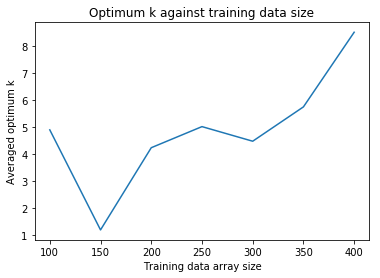

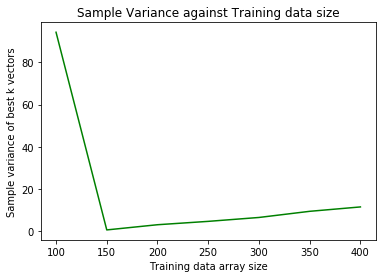

In [56]:
#########DONT RUN! It takes 15-20 minutes! #########
ind = 7 
runs = 100  #simulate 100 times to reduce the effect of randomness
trainsizevec = 100 + 50*(np.arange(ind))  #training data array sizes to be tested
bks = np.zeros((runs,ind))  #initialises array of best k's for each training data array size
final = np.zeros((1,ind))
for j in tqdm(np.arange(runs)):
        c = 0 #count
        for i in trainsizevec:
            bks[j,c] = optim_k(Xall[:i],tall[:i],kvals,5)  #finds optim k for each situation
            c = c + 1
            
        final = final + bks[j,:] #total optimum k for each training data size

final = final/runs  #array of each optimum k for each training data array size
plt.figure()
plt.plot(trainsizevec,final[0,:])
plt.title('Optimum k against training data size')
plt.xlabel('Training data array size')
plt.ylabel('Averaged optimum k')
varvals = bks.var(0)
plt.figure()
plt.plot(trainsizevec,varvals,'g')
plt.title('Sample Variance against Training data size')
plt.xlabel('Training data array size')
plt.ylabel('Sample variance of best k vectors')

### 1.2 Multi-layer perceptrons (MLP)

Multi-layer perceptrons are the sorts of neural networks that have been described in lectures.  In this section we'll use an MLP with weight decay regularisation to classify the same data again. 

The next cell sets up an MLP with 5 hidden units and the given regularisation constant ($\alpha$), trains it a few times from random starting places to find the best minimum (because $E(\mathbf{w})$ may have local minima) and uses it to classify points on a grid as above.

Performance with k=5,
	- on training set 0.976000 
	- on test set 0.916000


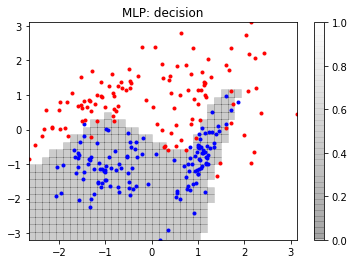

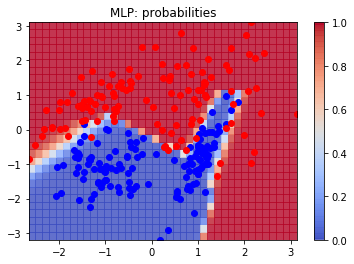

In [37]:
# load the Multi-Layer Perceptron class from Scikit-Learn
from sklearn.neural_network import MLPClassifier
# because initialisation is random, we train 10 times and take the best model (according to *training* error)
def bestmlp(Xtr,ttr,a,k,tr):
    Ebest = np.Inf
    for n in range(tr):
        mlp = MLPClassifier(solver='lbfgs',alpha = a, hidden_layer_sizes=(k,))
        mlp.fit(Xtr, ttr)
        if mlp.loss_ < Ebest:
            mlpbest = mlp
            Ebest = mlp.loss_
    mlp = mlpbest
    return mlp

mlp = bestmlp(Xtr,ttr,1e-2,5,10)
plot_decision_regions(X=Xtr, t=ttr, model=mlp, label='MLP', show_decision=True, show_probabilities=True)

Ste = mlp.score(Xte, tte)
Str = mlp.score(Xtr, ttr)
print('Performance with k=%i,\n\t- on training set %f \n\t- on test set %f' % (k, Str, Ste))


Experiment with different values of the regularisation constant, plotting the decision boundaries to visualise how the regularisation forces a smooth or more wiggly boundary.  Remember to vary $\alpha$ on a logarithmic scale and it could range between $10^{-16}$ (effectively 0) and $1$. 

<div style="text-align: right"><b>[5 marks]</b></div>

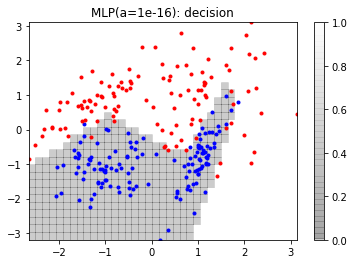

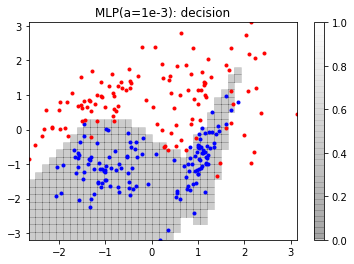

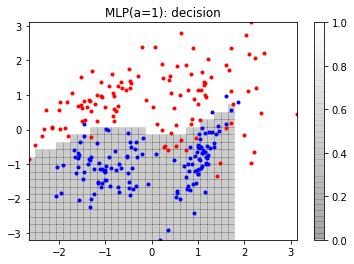

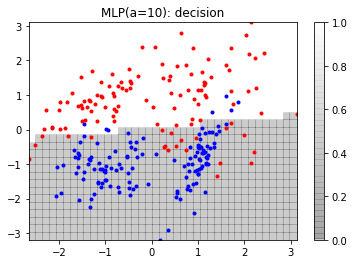

In [38]:
mlp = bestmlp(Xtr,ttr,1e-16,5,10)
plot_decision_regions(X=Xtr, t=ttr, model=mlp, label='MLP(a=1e-16)', show_probabilities=not True)

mlp = bestmlp(Xtr,ttr,1e-2,5,10)
plot_decision_regions(X=Xtr, t=ttr, model=mlp, label='MLP(a=1e-3)', show_probabilities=not True)

mlp = bestmlp(Xtr,ttr,1,5,10)
plot_decision_regions(X=Xtr, t=ttr, model=mlp, label='MLP(a=1)', show_probabilities=not True)

mlp = bestmlp(Xtr,ttr,10,5,10)
plot_decision_regions(X=Xtr, t=ttr, model=mlp, label='MLP(a=10)', show_probabilities=not True)

For really small values of alpha like 1e-16 , the decision boundary is overfitted and so a more wiggly boundary is produced as the noise is able to heavily influence the boundary therefore inhibiting generalisation.

For larger values of alpha like 10 and 1, we find the data has been heavily unfitted especially in the alpha = 10 case. For these we will see smoother decision boundaries.

Using MLP with a value of alpha = 1e-3 finds a good balance and maintains a relatively smooth boundary whilst implementing a decision boundary with a good fit.

Use cross-validation to choose the best value of the regularisation constant for these data.   Plot the training and validation data errors versus $\alpha$.  How well does the validation error correspond to the actual test error?

<div style="text-align: right"><b>[5 marks]</b></div>

Text(0, 0.5, 'error')

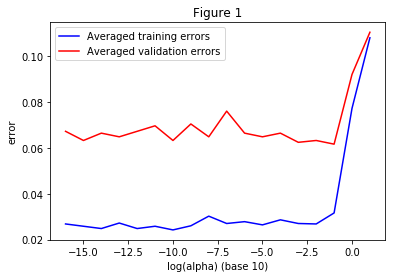

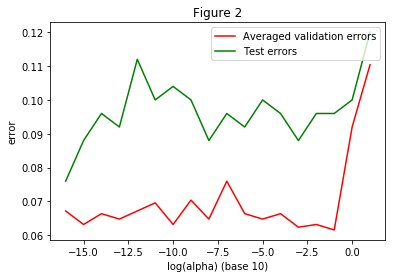

In [265]:
def mlp_err(Xtr,ttr,vals,folds):
    t_err_vec = np.zeros((1,len(vals)))  #initialises training error vector 
    v_err_vec = np.zeros((1,len(vals)))  #initialises validation error vector
    for i in np.arange(len(vals)):
        kf = KFold(n_splits=folds, shuffle=True) #sets up the kfold with 'folds' splits
        t_err = 0
        v_err = 0
        test_err = 0
        for train, validation in kf.split(Xtr):
            mlp = bestmlp(Xtr[train],ttr[train],10**int(vals[i]),5,10)  #finds best mlp model for each regularisation constant
            t_err = t_err + (1-mlp.score(Xtr[train],ttr[train]))  #adds the training errors for each fold
            v_err = v_err + (1-mlp.score(Xtr[validation],ttr[validation]))  #adds the validation errors for each fold
        
        t_err_vec[0,i] = t_err  #the total training error is stored in a vector; with position based on a value
        v_err_vec[0,i] = v_err  #the total validation error is stored in a vector; with position based on a value
        
    avt_err = t_err_vec/folds 
    avv_err = v_err_vec/folds   #turns total error vector into average error vector
    matr = np.stack((avt_err[0,:],avv_err[0,:]), axis=0) #stacks the vectors to output
    return matr


vals = np.arange(18) - 16   #vector of exponentials values
errors = np.zeros((1,len(vals)))
runs = 5  #runs to reduce randomness
for j in tqdm(np.arange(runs)):
    out = mlp_err(Xtr,ttr,vals,5)  #function above retrieves average training and validation errors for multiple regularisation constants
    errors = errors + out
    
errors = errors/runs  #averages across runs

test_err_vec = np.zeros((1,len(vals)))
for i in np.arange(len(vals)):
    mlp = bestmlp(Xtr,ttr,10**int(vals[i]),5,10)
    test_err_vec[0,i] = 1 - mlp.score(Xte,tte)  #calculating test error for each mlp model

plt.figure()
plt.plot(vals,errors[0,:], 'b', label = 'Averaged training errors')  #plots training and validation errors against alpha
plt.plot(vals,errors[1,:],'r',label = 'Averaged validation errors')
plt.legend()
plt.title('Figure 1') 
plt.xlabel('log(alpha) (base 10)')
plt.ylabel('error')
plt.figure()
plt.plot(vals,errors[1,:],'r',label = 'Averaged validation errors') #plots validation and test errors against alpha
plt.plot(vals,test_err_vec[0,:],'g', label = 'Test errors')
plt.legend() 
plt.title('Figure 2') 
plt.xlabel('log(alpha) (base 10)')
plt.ylabel('error')

In both figures we observe random noise but I have attempted to reduce this slightly by averaging over several runs for both the training and validation errors.

In Figure 1, we see the averaged training error spike at alpha = 1e-1 after remaining at a steady level for alpha < 1e-1. 

In Figure 2, we see a similar pattern occur for the averaged validation errors where there is spike at alpha = 1e-1 after remaining at a less steady level between for alpha < 1e-1.
The test error is consistently larger than the validation errors and follows a similar trend where there is an increase at alpha = 1e-1.
This is because larger changes in alpha will occur at higher values of log(alpha) where the difference between is 0.01 and 0.1 is much smaller than the difference between 0.1 and 1. (difference factor of 10)


Bonus question:  How should the best value of $\alpha$ vary as the number of training examples is increased? Why? Can you test it? 

<div style="text-align: right"><b>[5 marks]</b></div>

As you increase the no. of training examples the best value of alpha should 

In [17]:
def mlpval_err(Xtr,ttr,vals,folds):
    v_err_vec = np.zeros((1,len(vals)))  #initialises validation error vector
    for i in np.arange(len(vals)):
        kf = KFold(n_splits=folds, shuffle=True) #sets up the kfold with 'folds' splits
        v_err = 0
        for train, validation in kf.split(Xtr):
            mlp = bestmlp(Xtr[train],ttr[train],10**int(vals[i]),5,10)  #finds best mlp model for each regularisation constant
            v_err = v_err + (1-mlp.score(Xtr[validation],ttr[validation]))  #adds the validation errors for each fold

        v_err_vec[0,i] = v_err  #the total validation error is stored in a vector; with position based on a value
        
    avv_err = v_err_vec/folds  #turns total error vector into average error vector
    return avv_err[0,:]

In [18]:
def optim_a(Xtr,ttr,vals,folds):
    avv_err = mlpval_err(Xtr,ttr,vals,folds)
    r = np.where(avv_err == np.amin(avv_err)) #finds the location of the minimum validation error
    check = r[0]
    bestalpha = vals[check[0]]
    return bestalpha

Text(0, 0.5, 'best log(alpha)')

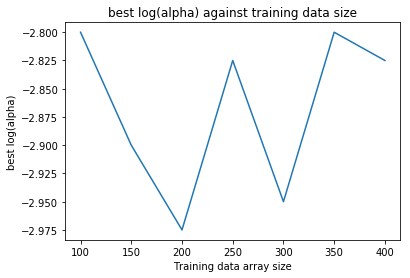

In [270]:
############### Takes 60 minutes to complete.###################
vals = np.arange(6) - 5
tdatasize = 100 + 50*np.arange(7)
bestaset = np.zeros((1,len(tdatasize)))
avbestaset = np.zeros((1,len(tdatasize)))
runs = 40
for j in tqdm(np.arange(runs)):
    c=0
    for i in tdatasize:
        bestaset[0,c] = optim_a(Xall[:i],tall[:i],vals,5)
        c = c + 1
          
    avbestaset = avbestaset + bestaset

avbestaset = avbestaset/runs
plt.figure()
plt.plot(tdatasize, avbestaset[0,:])
plt.title('best log(alpha) against training data size')
plt.xlabel('Training data array size')
plt.ylabel('best log(alpha)')

We'd expect to see a larger alpha for smaller training data array sizes as the smaller data sets are more prone to overfitting. Continued by alpha getting smaller as we increase the size of our training data.

In order to test this I make a function optim_a to find the best alpha based on the validation errors and then I iterate this across multiple training data sizes from 100 to 400 increments of 50. I also run this 40 times and take an average to reduce the randomness with kfold. 

Unfortunately we do not find any sort of correlation occurring. An argument could be made that increasing the number of runs could yield us with a better result but with 40 runs we see very little change(-2.8 to -2.975) in our best log(alpha) and so more runs could make this change even smaller. The randomness that occurs with our KFold and fitting model is more prevalent and so we'd want larger ranges of data sizes to more accurately test my hypothesis. 

### 1.3. Support Vector Machines (SVM)

Support vector machines (SVMs) are popular and powerful classifiers.  We'll deal with them in detail later in the module.  In the following you will use SVMs with both a "linear kernel" and with a RBF kernel.  With a linear kernel the SVM can only separate the classes with a straight line or a (hyper)plane, but an RBF kernel is nonlinear and allows the SVM to generate curved decision boundaries.  


We'll use the support vector machines in scikit learn.  Here's an example of training a SVM using a linear kernel (i.e., no non-linearity).

Performance:
	- on training set 0.904000 
	- on test set 0.880000


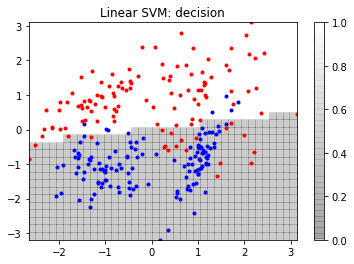

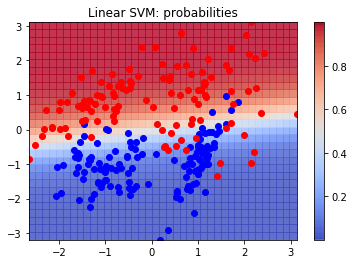

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)    # SVM with a linear kernel, 
                                                # note that enabling probabilities is slower
svm.fit(Xtr, ttr)                     # Train it on the training data

plot_decision_regions(X=Xtr, t=ttr, model=svm, label='Linear SVM', show_decision=True, show_probabilities=True)

Ste = svm.score(Xte, tte)
Str = svm.score(Xtr, ttr)
print('Performance:\n\t- on training set %f \n\t- on test set %f' % (Str, Ste))


Now use the SVM with <code>kernel='rbf'</code> to classify the data, but with a non-linear mapping so that the decision boundary can be non-linear. 

In this case the SVM has two additional parameters $C > 0$ and $\gamma$.  $C$ is a regularisation constant that controls how strongly points that lie on the wrong side of the decision boundary are penalised.  When $C$ is large, they are heavily penalised which results in the boundary being flexible, but when it is small they are lightly penalised so the boundary tends to be straighter.  You can set the value of $C$ (and $\gamma$) with

        svm = SVC(kernel='rbf', C=1, gamma=0.1) 

The default value of $C$ is 1 and the default value of $\gamma$ is 0.1.

Performance with C=1.000000, gamma=0.100000,
	- on training set 0.960000 
	- on test set 0.912000


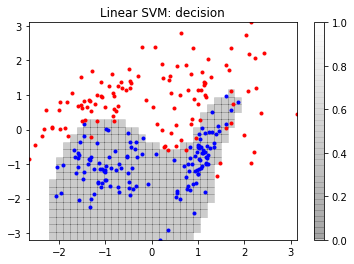

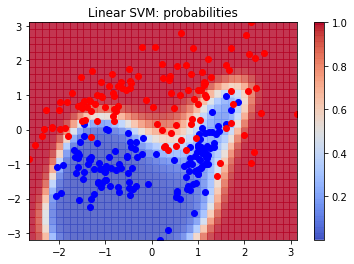

In [24]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10000, gamma=0.1, probability=True)            # SVM with a RBF kernel
svm.fit(Xtr, ttr)                     # Train it on the training data

plot_decision_regions(X=Xtr, t=ttr, model=svm, label='Linear SVM', show_decision=True, show_probabilities=True)

Ste = svm.score(Xte, tte)
Str = svm.score(Xtr, ttr)
print('Performance with C=%f, gamma=%f,\n\t- on training set %f \n\t- on test set %f' % (1, 0.1, Str, Ste))


The $\gamma$ parameter controls the width of the RBF kernel, that is how close training samples must be to interact with each other.  When $\gamma$ is large the training samples must be close to interact and the decision boundary tends to be nonlinear, whereas when $\gamma$ is small it tends to be smooth.

Use cross validation on the *training* data to choose the best value of $C$ and $\gamma$.  Try a few values of $C$ and $\gamma$ by hand first of all to find appropriate ranges and it will  be best to vary them on a logrithmic scale.  You may care to investigate and use the sklearn helper functions for searching a grid of values for the best cross validation value: see <http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#example-svm-plot-rbf-parameters-py> or write your own!

What is the resulting accuracy on the test data and the best decision boundary?

<div style="text-align: right"><b>[15 marks]</b></div>

The best parameters are {'C': 10.0, 'gamma': 1.0} with a training score of 0.94
The score of the test data is 0.928


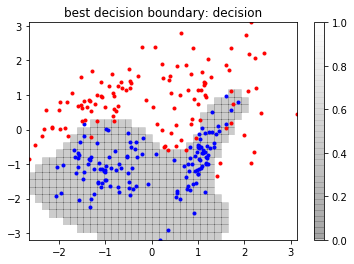

In [45]:
from sklearn.model_selection import GridSearchCV

parameters = {'gamma': np.logspace(-2, 2, 5), 'C': np.logspace(-2, 3, 6)} #defined ranges of C and gamma
cv = KFold(n_splits=5, shuffle= True)  #set up KFold
grid = GridSearchCV(SVC(kernel = 'rbf', probability = True), parameters, cv=cv) #performs cross validation using values from C and gamma
grid.fit(Xtr, ttr)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

svm = SVC(kernel='rbf', C = grid.best_params_['C'], gamma = grid.best_params_['gamma'] , probability=True)   # SVM with a RBF kernel
svm.fit(Xtr, ttr)   #refit the model using all the training data
tscore = svm.score(Xte,tte)
print("The score of the test data is",tscore)

plot_decision_regions(X=Xtr, t=ttr, model=svm, label='best decision boundary', show_probabilities=not True)

Using the rbf kernel and a grid search cross validation function, we test for the best parameters to retrieve the best decision boundary. As can be seen the classifier finds a good balance and does not seem to overfit the data due tot he smoothness of the boundary. The model does get a blue wrong and various reds classified wrong but not enough to infer an obvious presence of underfitting. The parameters do not vary much after numerous runs inferring the parameters are a strong pair in comparison to other pairs of parameters. Further comparisons of pairs could be found by producing a heatmap of the training error for a grid of possible values of C and gamma.

## Part 2: Digits dataset

In the second part, we will experiment with the same algorithm on a more complex dataset: examples images of hand-written digits. For this we will use a standard dataset provided by sklearn: <i>digits</i>

(1797, 64)
[0 1 2 3 4 5 6 7 8 9]


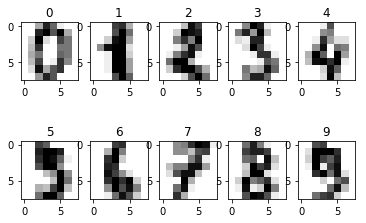

In [46]:
from sklearn import datasets

# (note: we overwrite the previous data here, make sure to reload it if you go back to part 1)
Xall, tall = datasets.load_digits(return_X_y=True)

print(Xall.shape)
print(np.unique(tall))

# print some examples of data from the dataset
for j in range(10):
    plt.subplot(2,5,j+1)
    plt.imshow(np.reshape(Xall[j,:], (8,8)), cmap=plt.cm.gray_r)
    plt.title("%d" % tall[j])
plt.show()

As you can see there are 1797 images arranged as 64-dimensional vectors, and defining 10 classes. In this case, the observed variables have many more dimensions, but we can use <i>multidimensional scaling</i> to visualise the distribution of the classes somehow (note that MDS on a large dataset can take a while).  

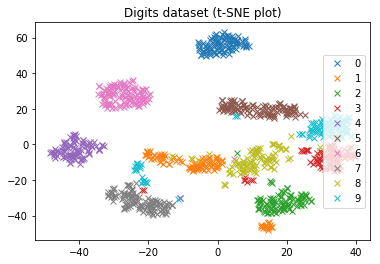

In [47]:
from sklearn.manifold import TSNE

# we select a subset of samples for speed 
Ntrain=1000
J = np.random.permutation(Xall.shape[0])[:Ntrain]
X = Xall[J,:]
t = tall[J]   # Features

# we then optimise the multidimensional scaling 
tsne = TSNE()
Xe = tsne.fit_transform(X)

# we then draw the classes on a 2D plot
for i in range(10):
    plt.plot(Xe[t==i,0], Xe[t==i,1], 'x', label='{}'.format(i))
plt.legend(loc='right')
plt.title('Digits dataset (t-SNE plot)')
plt.show()

This means that you have problem of <b>multiclass</b> classification. Some algorithms such as k-NN or MLPs can handle multiclass, whereas some other such as SVM need some additional work. 

In [48]:
#Example with k-NN:  

I = range(len(tall))    # you could change this for np.random.permutation(len(tall)) to get a random selection
                        # do not do this for this workshop as I want to be able to compare final performance. 

Itrain = I[:len(tall)//2]   # First half of indices for training
Itest = I[len(tall)//2:]    # Second half for test

Xtr = Xall[Itrain,:] # we define variables for the training set...
ttr = tall[Itrain]   

Xte = Xall[Itest,:]  # ... and for the test set
tte = tall[Itest]   

k = 5   # Choose the number of nearest neighbours

knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtr, ttr)

# we can get the performance on the training set
Str = knn.score(Xtr, ttr)

# we can also calculate the performance on the test set: 
Ste = knn.score(Xte, tte)

print('Performance with k=%i,\n\t- on training set %f \n\t- on test set %f' % (k, Str, Ste))


Performance with k=5,
	- on training set 0.988864 
	- on test set 0.955506


In a multiclass setting it is often worth calculating another error measure: the confusion matrix. This matrix tells you where your error comes from and whether two classes are specially confused.  

Confusion matrix, without normalization
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  1 82  0  2  0  3  2  1]
 [ 0  0  0  0 87  0  0  1  0  4]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  5  1  1  0  0  0  1 79  1]
 [ 0  0  0  4  0  2  0  0  1 85]]


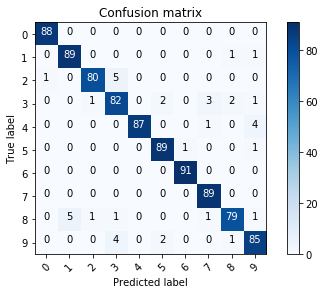

In [49]:
from sklearn import metrics
import itertools

from sklearn.metrics import confusion_matrix

# we predict the classes on the test data
pte = knn.predict(Xte)

# and we calculate the confusion matrix
cm = confusion_matrix(tte, pte)

np.set_printoptions(precision=2)


# code from: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
# now included in sklearn 0.22

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, np.unique(tte))

### 2.1 Digits with knn 
As a first shot, we will use the k-NN algorithm to try and model this dataset.
As we did before, use k-fold cross validation to find the best value of $k$. 
<div style="text-align: right"><b>[5 marks]</b></div>

Calculate the confusion matrix for the best parameter, show some examples of the misclassifications and try to explain the remaining errors. 
<div style="text-align: right"><b>[5 marks]</b></div>

In [52]:
kvals = np.arange(20) + 1  #values of k to compare
bestk = optim_k(Xtr,ttr,kvals,5)  #using function made earlier to find the optimum k based on smallest validation error
print("The best k is",bestk)
knn = neighbors.KNeighborsClassifier(n_neighbors=bestk)
knn.fit(Xtr,ttr)
trscore = knn.score(Xtr, ttr)
tescore = knn.score(Xte, tte)
print('Performance with k=%i,\n\t- on training set %f \n\t- on test set %f' % (bestk, trscore, tescore))

The best k is 3
Performance with k=3,
	- on training set 0.992205 
	- on test set 0.963293


Confusion matrix, without normalization
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  1  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  1 84  0  1  0  2  2  1]
 [ 0  0  0  0 86  0  0  0  0  6]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  2  1  1  0  0  0  0 84  0]
 [ 0  0  0  3  0  2  0  0  1 86]]


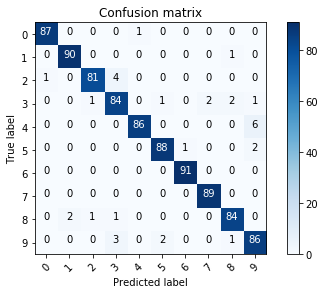

In [53]:
pte = knn.predict(Xte)
cm = confusion_matrix(tte, pte)
plot_confusion_matrix(cm, np.unique(tte))

In [54]:
def find_misclass(Xte,pte,tte,pre,tru): #function(test data ,predicted targets array,actual targets array,predicted class,actual class)
    ploc = np.where(pte == pre)  #finds locations of predicted label pre in array pte.
    tloc = np.where(tte == tru)  #finds locations of predicted label tru in array tte.
    locs = np.intersect1d(ploc[0],tloc[0])   #finds intersect of locations
    mdata = Xte[locs]   #data of misclassifications found
    for i in np.arange(len(locs)):
        plt.subplot(1,len(locs),i+1)
        plt.imshow(np.reshape(mdata[i,:], (8,8)), cmap=plt.cm.gray_r)
        
    plt.show()

I made a function to look at specific misclassification and talk about the common ones that occur below. On the low chance they dont occur please run the question again.

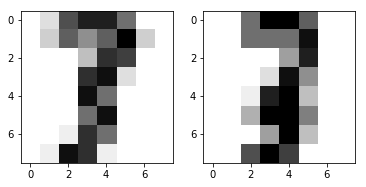

In [55]:
find_misclass(Xte,pte,tte,7,3)  #finds examples classified as 7 but actually of class 3.

Predicted to be of class 7(number 7) but actually the number 3. 3 and 7 follow a similar pattern if the middle and bottom parts of the 3 aren't as protruding as the top. This leads to a misclassification. The heavy distortion also contributes to this.

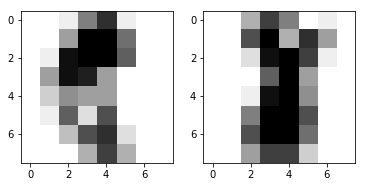

In [56]:
find_misclass(Xte,pte,tte,1,8)

Predicted to be of class 1, but actually of class 8. The knn classifier makes the mistake as these eights seem compressed to look closer to 1 which may explain why the classifier is making the mistake. As mentioned before the heavy distortion plays a major part in the misclassification.

### 2.2 Digits with MLP
As a second attempt 
As we did before, use k-fold cross validation to train an MLP on this data, optimising regularisation parameter $\alpha$ and the number of hidden units. 
<div style="text-align: right"><b>[10 marks]</b></div>

Calculate the confusion matrix for the best parameter, show some examples of the misclassifications and try to explain the remaining errors. 
<div style="text-align: right"><b>[5 marks]</b></div>

In [74]:
############ May take 5 minutes ################
cv = KFold(n_splits=5, shuffle= True, random_state=42)  #sets up the kfold
parameters = {'alpha': 10.0 ** -np.arange(0, 7), 'hidden_layer_sizes':np.arange(10, 40)}  #We set up the range of parameters to test in our grid search
grid = GridSearchCV(MLPClassifier(solver = 'lbfgs'), parameters, cv=cv)
grid.fit(Xtr, ttr)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

mlp = bestmlp(Xtr,ttr,grid.best_params_['alpha'],grid.best_params_['hidden_layer_sizes'],10)  #refit using all the data
print("a =",grid.best_params_['alpha'],"hidden layers =",grid.best_params_['hidden_layer_sizes'],"test score =", mlp.score(Xte,tte))


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best parameters are {'alpha': 1.0, 'hidden_layer_sizes': 39} with a score of 0.97
a = 1.0 hidden layers = 39 test score = 0.9521690767519466


Confusion matrix, without normalization
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 83  0  2  0  0  0  0  1  5]
 [ 0  0 86  0  0  0  0  0  0  0]
 [ 0  0  0 77  0  4  0  2  8  0]
 [ 0  0  0  0 85  0  3  0  0  4]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  2  0  0  1  2  0  1 82  0]
 [ 0  0  0  1  0  2  0  0  0 89]]


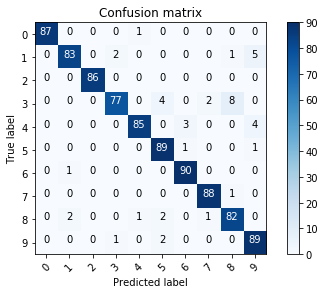

In [75]:
pte = mlp.predict(Xte)
cm = confusion_matrix(tte, pte)
plot_confusion_matrix(cm, np.unique(tte))

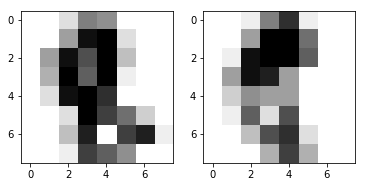

In [76]:
find_misclass(Xte,pte,tte,1,8)

Similar with the knn case the classification confuses distorted eights as ones.

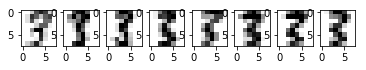

In [77]:
find_misclass(Xte,pte,tte,8,3)

MLP commonly confuses 3s for 8s which may be due to the similar shape of a 3 to an 8 sliced in half. This combined with the distortion will lead to a misclassification.

### 2.3 Digits with SVM 
The last exercise in this workshop will be to use the SVM classifier for this data. In standard, SVMs only allow for binary classification. The standard approach to use them on multiclass problem is to decompose the problem in N 1 vs all classification problem: ie, in this case, this would mean learning one SVM for classifying digit 0 against all other (eg, [1,2,3,4,5,6,7,8,9]), a second classifier for classifying digit 1 against all others, etc. 
The final classification is given by the classifier that yields the strongest confidence. 

This is not too hard to implement, but luckily sklearn implements 1 vs all as standard in the SVC classes. 

Train linear an non linear SVMs, using k-fold cross validation to find the best value for $C$ and $\gamma$. 
<div style="text-align: right"><b>[10 marks]</b></div>

Calculate the confusion matrix for the best parameter, show some examples of the misclassifications and try to explain the remaining errors. 
<div style="text-align: right"><b>[5 marks]</b></div>

In [62]:
#cv = KFold(n_splits=5, shuffle= True)
#parameters = {'kernel': ['linear']}
#grid = GridSearchCV(SVC(probability = True), parameters, cv=cv)
#grid.fit(Xtr, ttr)
#print("The best parameters are %s with a score of %0.2f"
#      % (grid.best_params_, grid.best_score_))

svm = SVC(kernel='linear', probability=True)    #SVM with Linear case       
svm.fit(Xtr, ttr)  #Fit using all the training data
print("The SVC(linear) test score is", svm.score(Xte,tte))

The SVC(linear) test score is 0.9443826473859844


Confusion matrix, without normalization
[[87  0  0  0  0  0  1  0  0  0]
 [ 0 82  0  0  0  0  0  0  3  6]
 [ 1  0 85  0  0  0  0  0  0  0]
 [ 0  0  0 78  0  4  0  1  8  0]
 [ 1  0  0  0 87  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  1  0  0  1  2  0 85  0  0]
 [ 0  3  0  1  0  1  0  1 81  1]
 [ 1  0  0  1  0  3  0  1  0 86]]


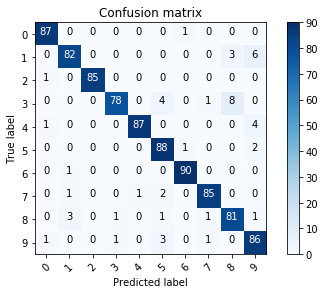

In [63]:
pte = svm.predict(Xte)
cm = confusion_matrix(tte, pte)
plot_confusion_matrix(cm, np.unique(tte))

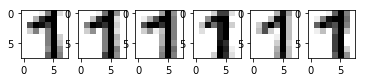

In [66]:
find_misclass(Xte,pte,tte,9,1)

The model has classified these ones as nines. Ones cover similar regions of the image to the nines however since all these ones look very similar, I will draw this down to the model not having similar looking ones in the training data or very distorted nines and so its classification of the test data will not be as strong.

In [67]:
cv = KFold(n_splits=5, shuffle= True)  #Sets up KFold
parameters = {'gamma': np.logspace(-5, 2, 8), 'C': np.logspace(-2, 3, 6)}  #initialise vector of C and gamma parameters to check
grid = GridSearchCV(SVC(kernel = 'rbf', probability = True), parameters, cv=cv)  #use gridsearch to find the best parameters
grid.fit(Xtr, ttr)   
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

svm = SVC(kernel='rbf', C = grid.best_params_['C'], gamma = grid.best_params_['gamma'] , probability=True)   # SVM with a RBF kernel
svm.fit(Xtr, ttr)   #Refit using all the data and the best parameters
print("The SVC(rbf) test score is", svm.score(Xte,tte))

The best parameters are {'C': 1.0, 'gamma': 0.001} with a score of 0.99
The SVC(rbf) test score is 0.9688542825361512


Confusion matrix, without normalization
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


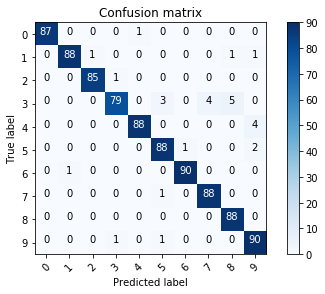

In [68]:
pte = svm.predict(Xte)
cm = confusion_matrix(tte, pte)
plot_confusion_matrix(cm, np.unique(tte))

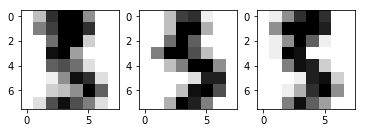

In [69]:
find_misclass(Xte,pte,tte,5,3)

These images are classified as fives but at actually threes. Personally I can see how these would be identified as fives but could be threes due mainly to the heavy distortion in the top half of the image.

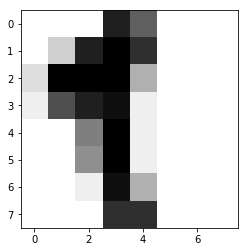

In [70]:
find_misclass(Xte,pte,tte,8,1)

Not many 8s and 1s are misclassified as each other in this model showcasing the strength of this model in comparison to the others where this is a common misclassification in the others.

Compare performance of all 3 algorithms for this problem. Discuss the differences in the remaining errors and what would be your suggestion going forward with this dataset. 
<div style="text-align: right"><b>[10 marks]</b></div>

<b>Take care that scores do change sometimes upon running the code due to randomness within the fold but the general order of model preference does not(or rarely if the case)!</b>

In terms of test score, the SVM(rbf) classification performs the best when C = 1 and gamma = 0.001 with a score of 0.969 (3dp). The Knn Classifier is the next best when k=3 the classifier produces a test score of 0.963. The MLP classifier is next with a test score of 0.952 closely followed by our Linear SVM classification with a score of 0.944. The test score of the MLP classifier ranges a lot producing test scores from 0.937 to 0.952 due to the randomness in the kfold and fitting of the model.

The SVM(rbf) doesnt produce the common misclassifications that the MLP, KNN, SVM(linear) produce. For example ones and eights are commonly misclassified as each other but the SVM has not mistaken any eights for ones and only 1 one for an eight(shown above). Both SVM(rbf) and MLP are are slow in comparison to the KNN classifier which is most likely due to the fact I am testing a small amount of k values. However I think it is mainly important that the classifier has a low misclassification rate. 

In our confusion matrices we see misclassifications across similar numbers this could be explained by various reasons. 1. The image is blurry or hard to put into a single class. 2. The set I train with could have very little of class 7 and could be cause for a misclassification. In the cell below I looked out our training data and found the number of training pairs for each class was not consistent but I don't believe this inconstistency is large enough to make a strong enough difference in classification. 

Then it may be the case where heavy distortion occurs more in some numbers than others so that when training, the model will suffer for those numbers as it did not have good cases to train on in order to predict them in the future.

Overall my suggestion would be using the SVM classifier with the rbf kernel in order to reduce the misclassification rate the most. I also think increasing the size of the training dataset as well as having a mix of good and bad cases (heavy and light distortion) will allow the classifier to perform at its best.


In [78]:
num = np.zeros((1,10))
for i in np.arange(10):
    num[0,i] = (ttr == i).sum()

print(num)

[[90. 91. 91. 92. 89. 91. 90. 90. 86. 88.]]


Number of training pairs for each class.